In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
import math
from helper import preprocess_data

def readData(filename) :
    data = pd.read_csv(filename, skipinitialspace=True,header=None)
    return [d for d in data.itertuples(index=False, name=None)]

In [4]:
data_cat = readData("hw4_cat.txt")
mtx_cat = np.reshape(data_cat, (64,500))

data_grass = readData("hw4_grass.txt")
mtx_grass = np.reshape(data_grass, (64,500))

Y = plt.imread("cat_grass.png")
Y = preprocess_data(Y)
Y = np.matrix(Y)

cat_mean = np.mean(data_cat,1)
cat_mean = np.reshape(cat_mean, (len(cat_mean),1))
cat_mean = np.matrix(cat_mean)

grass_mean = np.mean(data_grass,1)
grass_mean = np.reshape(grass_mean, (len(grass_mean),1))
grass_mean = np.matrix(grass_mean)

cat_cov = np.cov(data_cat)
cat_cov = np.matrix(cat_cov)

grass_cov = np.cov(data_grass)
grass_cov = np.matrix(grass_cov)

AxesImage(54,36;334.8x217.44)


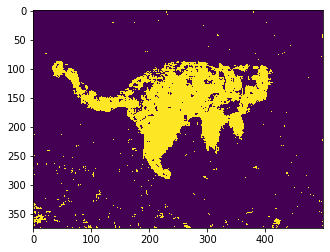

In [5]:
cat_det = np.linalg.det(cat_cov)
grass_det = np.linalg.det(grass_cov)

output = []
for i in range(187500):
    yk = Y[:,i]
    yk = np.reshape(yk,(len(yk),1))
    yk = np.matrix(yk)

    cat_p = -32*math.log(2*math.pi)-(1/2)*math.log(cat_det)-(1/2)*(yk-cat_mean).T*cat_cov.I*(yk-cat_mean)+math.log(1/2)
    grass_p = -32*math.log(2*math.pi)-(1/2)*math.log(grass_det)-(1/2)*(yk-grass_mean).T*grass_cov.I*(yk-grass_mean)+math.log(1/2)
    if cat_p > grass_p:
        output.append(1)
    else:
        output.append(0)
    i = i + 1

output = np.reshape(output,(375,500))
print(plt.imshow(output))
plt.imsave("hw4_01.png", output, format = "png")  